In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Reading saved data into "Dataframe"
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/INSAID/wine.csv')
df.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
# check if all columns (except target column ["name" column in this case] are numerical)
# even if one of the features is of type that is "not" numerical e.g. string, obj etc .. then PCA cannot be executed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 177 non-null    int64  
 1   alcohol              177 non-null    float64
 2   malicAcid            177 non-null    float64
 3   ash                  177 non-null    float64
 4   ashalcalinity        177 non-null    float64
 5   magnesium            177 non-null    int64  
 6   totalPhenols         177 non-null    float64
 7   flavanoids           177 non-null    float64
 8   nonFlavanoidPhenols  177 non-null    float64
 9   proanthocyanins      177 non-null    float64
 10  colorIntensity       177 non-null    float64
 11  hue                  177 non-null    float64
 12  od280_od315          177 non-null    float64
 13  proline              177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


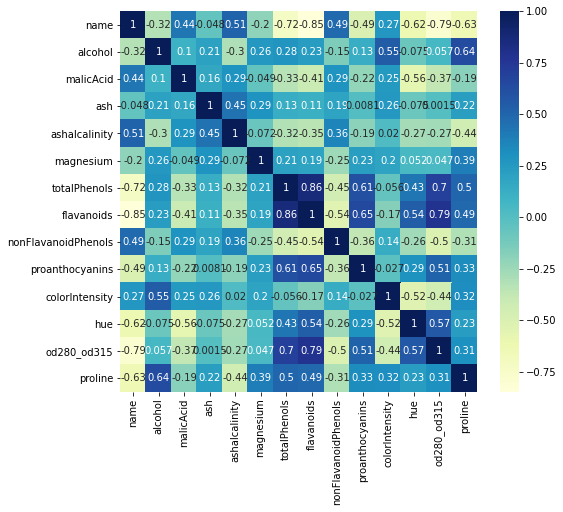

In [5]:
# checking correlation inside the dataset
plt.figure(figsize = (8, 7))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()
# Examine Heatmap for multicollinearlity

<Figure size 576x504 with 0 Axes>

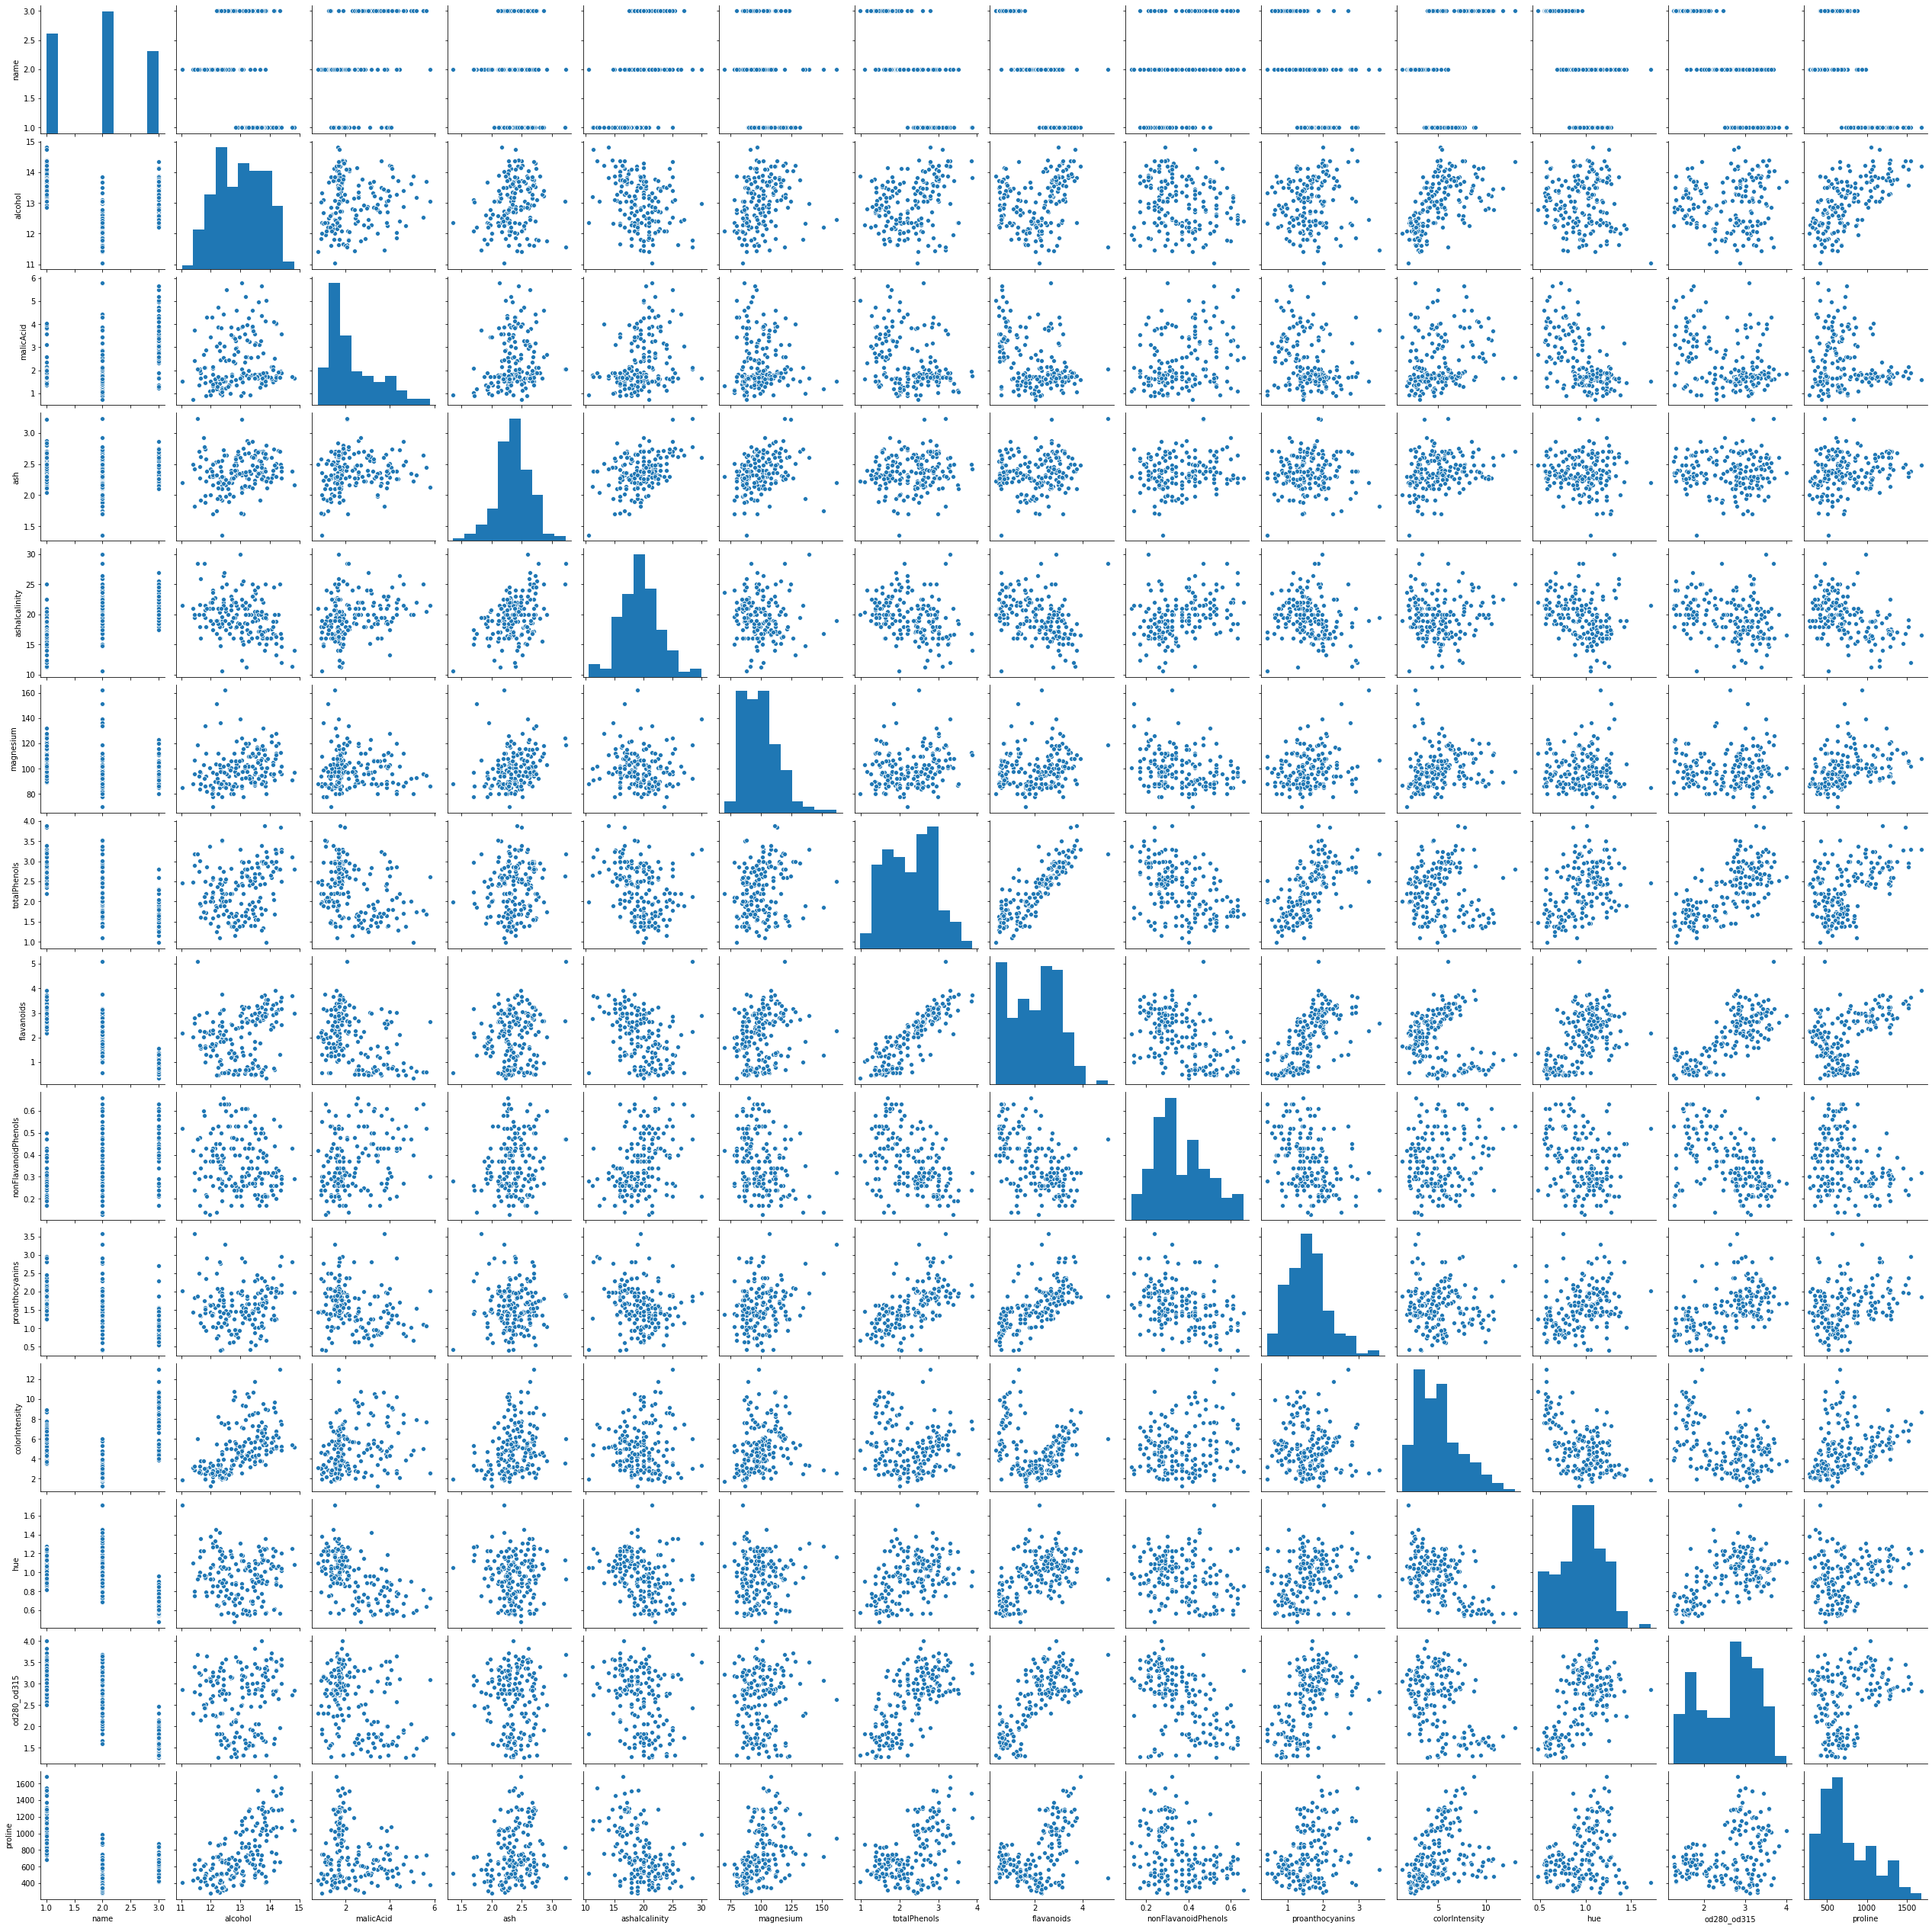

In [6]:
# pairplots another way of observing relationship between columns
plt.figure(figsize=(8,7))
sns.pairplot(df)
plt.show()

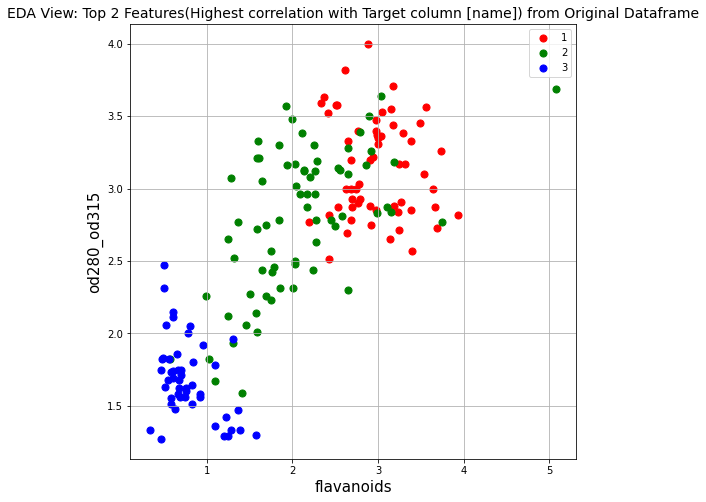

In [7]:
# for purpose of viewing classification 
# we take 2 features with good correlation with Target Variable

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('flavanoids', fontsize = 15)
ax.set_ylabel('od280_od315', fontsize = 15)
ax.set_title('EDA View: Top 2 Features(Highest correlation with Target column [name]) from Original Dataframe', fontsize = 14)
targets = [1,2,3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['name'] == target
    ax.scatter(df.loc[indicesToKeep, 'flavanoids']
               , df.loc[indicesToKeep, 'od280_od315']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [8]:
#  Getting predictor variables to X
X = df.drop(['name'],axis=1)

y= df['name']#class variable


In [9]:
X.describe()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X)
# ensure to understand its importance

In [11]:
x

array([[ 0.2558245 , -0.50162433, -0.8244853 , ...,  0.40709978,
         1.13169801,  0.97105248],
       [ 0.20622873,  0.01802001,  1.10768971, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [ 1.70650069, -0.34931478,  0.48793547, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 0.34261709,  1.73822194, -0.38701171, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 0.21862767,  0.22408586,  0.01400575, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.40892609,  1.57695301,  1.36288264, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [12]:
# Let us view entire possible transformation for df under consideration
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)


In [14]:
PC_df = pd.DataFrame(data = principalComponents)
PC_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.230243,0.302313,-2.032920,-0.281906,-0.259540,-0.927615,0.079724,1.026470,-0.313145,0.131256,-0.153252,0.401035,0.001901
1,2.531922,-1.062257,0.976724,0.735727,-0.198602,0.557252,0.432350,-0.335611,-1.179069,0.006752,-0.275374,0.003380,0.021606
2,3.754677,-2.805309,-0.180370,0.577125,-0.257871,0.100109,-0.364924,0.646847,0.067906,0.373320,0.696435,-0.241100,-0.370466
3,1.020131,-0.888380,2.023870,-0.432792,0.275235,-0.403139,0.454721,0.412033,0.338059,-0.096320,-0.541460,-0.187797,-0.081820
4,3.049199,-2.170007,-0.638747,-0.487628,-0.631358,0.130817,0.421297,0.398731,-0.113454,-0.020025,0.389118,-0.380857,0.144580


In [15]:
# for Data Vizualization we need only Top 2 features 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
PC_df = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
PC_df.head()

,PC1,PC2
0,2.230243,0.302313
1,2.531922,-1.062257
2,3.754677,-2.805309
3,1.020131,-0.888380
4,3.049199,-2.170007


In [16]:
data_viz_Df = pd.concat([PC_df, df[['name']]], axis = 1)
data_viz_Df.head()

,PC1,PC2,name
0,2.230243,0.302313,1
1,2.531922,-1.062257,1
2,3.754677,-2.805309,1
3,1.020131,-0.888380,1
4,3.049199,-2.170007,1


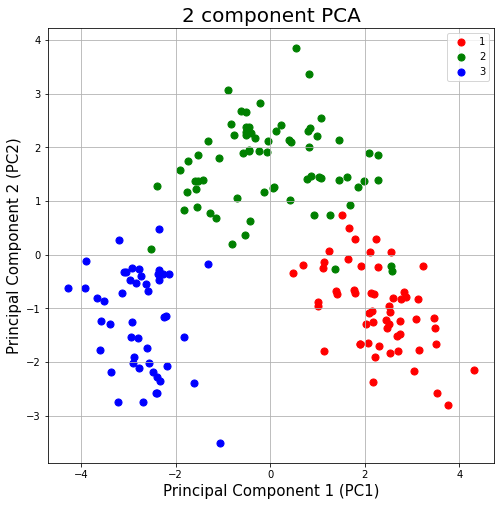

In [17]:
# code to plot classification on 2-D plane with PC1 and PC2
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1 (PC1)', fontsize = 15)
ax.set_ylabel('Principal Component 2 (PC2)', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2,3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = data_viz_Df['name'] == target
    ax.scatter(data_viz_Df.loc[indicesToKeep, 'PC1']
               , data_viz_Df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()